In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Create engine using the `spacex.sqlite` database file
engine = create_engine("sqlite:///ufo.sqlite")

In [3]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

ufo
-----------
datetime DATETIME
city TEXT
state TEXT
country TEXT
shape TEXT
duration_seconds FLOAT
duration_hours_min TEXT
comments TEXT
date_posted TEXT
latitude FLOAT
longitude  FLOAT
hour INTEGER
month INTEGER
year INTEGER
dayofweek TEXT



In [4]:
# min_duration

In [7]:
# build the query
query = f"""
SELECT *
FROM ufo
-- WHERE shape != 'unknown' AND city != 'unknown' AND state != 'unknown' AND country != 'unknown' AND comments != 'unknown' 
"""

# execute query
shape_df = pd.read_sql(text(query), con=engine)
shape_df.head(10)

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude,hour,month,year,dayofweek
0,1994-10-10 18:30:00.000000,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,18,10,1994,Monday
1,1994-10-10 22:00:00.000000,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,22,10,1994,Monday
2,1995-10-10 19:45:00.000000,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,Tuesday
3,1995-10-10 22:40:00.000000,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,Tuesday
4,1996-10-10 03:20:00.000000,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,3,10,1996,Thursday
5,1996-10-10 22:00:00.000000,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,22,10,1996,Thursday
6,1996-10-10 22:30:00.000000,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,22,10,1996,Thursday
7,1997-10-10 17:00:00.000000,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,17,10,1997,Friday
8,1997-10-10 20:00:00.000000,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,20,10,1997,Friday
9,1997-10-10 21:00:00.000000,austin,mn,us,other,3600.0,1-hour,i was traveling northbound on state highway 10...,1/28/1999,43.666667,-92.974444,21,10,1997,Friday


In [8]:
shape_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            58560 non-null  object 
 1   city                58560 non-null  object 
 2   state               58560 non-null  object 
 3   country             58560 non-null  object 
 4   shape               58560 non-null  object 
 5   duration_seconds    58560 non-null  float64
 6   duration_hours_min  58560 non-null  object 
 7   comments            58560 non-null  object 
 8   date_posted         58560 non-null  object 
 9   latitude            58560 non-null  float64
 10  longitude           58560 non-null  float64
 11  hour                58560 non-null  int64  
 12  month               58560 non-null  int64  
 13  year                58560 non-null  int64  
 14  dayofweek           58560 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.7+

In [9]:
query = f"""
SELECT *
FROM ufo
WHERE shape = 'unknown';
"""

# execute query
df_shape = pd.read_sql(text(query), con=engine)
df_shape.head(10)


,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude,hour,month,year,dayofweek
0,1995-10-10 19:45:00.000000,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,19,10,1995,Tuesday
1,1995-10-10 22:40:00.000000,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722,22,10,1995,Tuesday
2,1999-10-10 04:00:00.000000,kansas city,ks,us,unknown,600.0,5-10 min.,Orange object over city.,10/19/1999,39.114167,-94.627222,4,10,1999,Sunday
3,2000-10-10 21:30:00.000000,seattle (west),wa,us,unknown,10.0,10 sec,Dark object in the shape of a (4) after dusk i...,2/11/2003,47.606389,-122.330833,21,10,2000,Tuesday
4,2002-10-10 02:00:00.000000,philomath,or,us,unknown,5.0,about5seconds,i watched on the portland news that the space ...,10/15/2002,44.540278,-123.366389,2,10,2002,Thursday
5,2004-10-10 15:00:00.000000,berkeley,ca,us,unknown,180.0,3 minutes,While driving my car in the mid afternoon of a...,5/24/2005,37.871667,-122.271667,15,10,2004,Sunday
6,2005-10-10 21:00:00.000000,lewisburg,tn,us,unknown,240.0,4 minutes,Like a grouping of balloons with a slight glow...,12/7/2006,35.449167,-86.788889,21,10,2005,Monday
7,2006-10-10 12:37:00.000000,blairsville,ga,us,unknown,10.0,<10 sec.,Intermittant streak by moon&#44 not seen on ph...,10/30/2006,34.876111,-83.958333,12,10,2006,Tuesday
8,2006-10-10 23:00:00.000000,lyndhurst,oh,us,unknown,300.0,5 minutes,This is a follow up to my Feb. 16th&#44 1995 r...,10/30/2006,41.520000,-81.488889,23,10,2006,Tuesday
9,2007-10-10 20:30:00.000000,conyers,ga,us,unknown,3600.0,1 hour,Craft seen falling and dissapears into thin ai...,11/28/2007,33.667500,-84.017778,20,10,2007,Wednesday


### Value count on days of the week --> Bar chart (histogram of which day has the highest frequency)

In [10]:
shape_df.dayofweek.value_counts()

dayofweek
Saturday     10419
Sunday        8476
Friday        8473
Wednesday     8053
Thursday      8015
Tuesday       7849
Monday        7275
Name: count, dtype: int64

In [11]:
query = f"""
SELECT 
    TO_CHAR(datetime, 'Day') AS dayofweek, 
    COUNT(*) AS frequency
FROM 
    ufo
GROUP BY 
    dayofweek
ORDER BY 
    frequency DESC;
"""


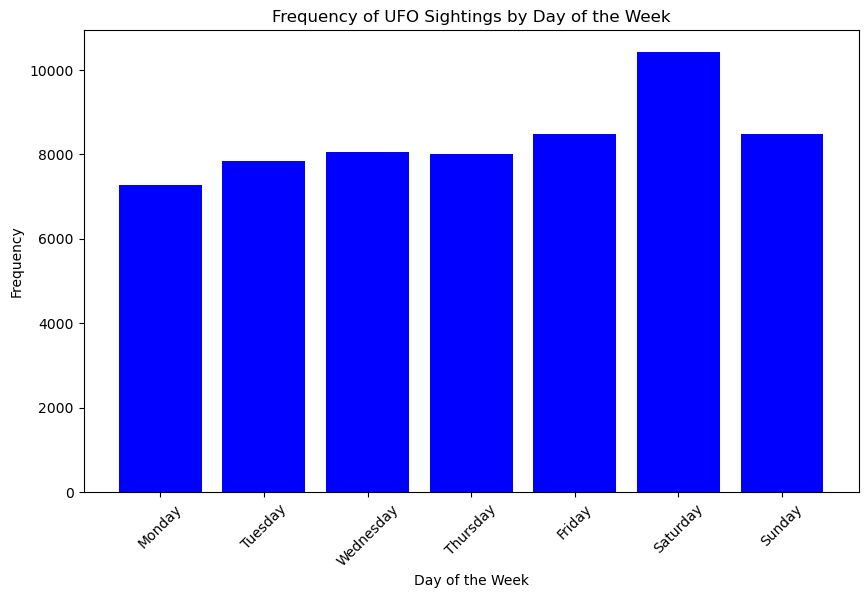

In [12]:
day_frequency = df['dayofweek'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Convert to DataFrame for easy plotting (if needed)
df_frequency = day_frequency.reset_index()
df_frequency.columns = ['dayofweek', 'frequency']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_frequency['dayofweek'], df_frequency['frequency'], color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of UFO Sightings by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [21]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

yearly_sightings = df.groupby('year').size()
df_yearly_sightings['year'] = df_yearly_sightings['year'].astype(int)


In [22]:
df_yearly_sightings = yearly_sightings.reset_index()
df_yearly_sightings.columns = ['year', 'number_of_sightings']

# Display the result
df_yearly_sightings

,year,number_of_sightings
0,1994,321
1,1995,895
2,1996,634
3,1997,990
4,1998,1371
5,1999,2234
6,2000,2155
7,2001,2417
8,2002,2404
9,2003,2921


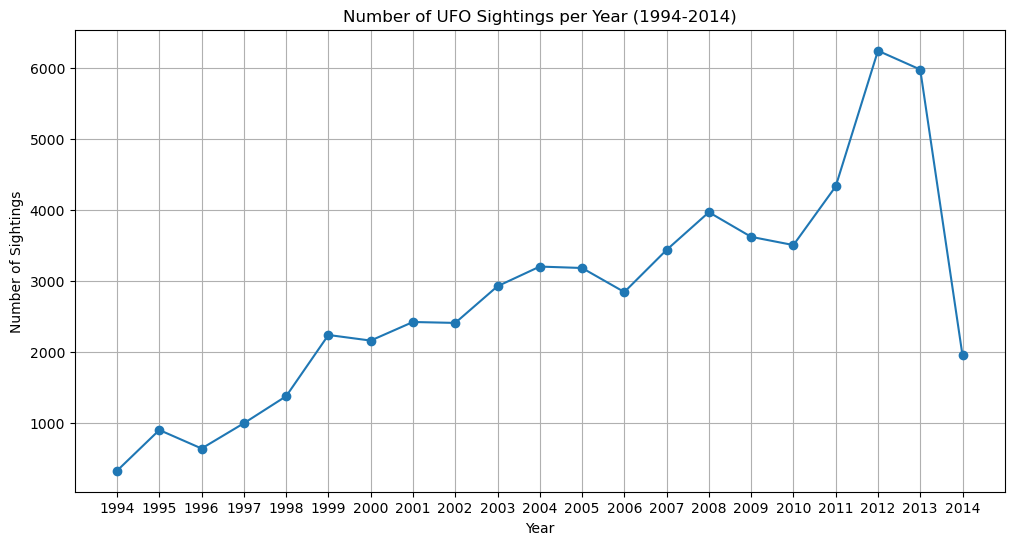

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_sightings['year'], df_yearly_sightings['number_of_sightings'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Number of UFO Sightings per Year (1994-2014)')
plt.grid(True)
plt.xticks(df_yearly_sightings['year'])  # Ensures only integer years are shown on the x-axis
plt.show()

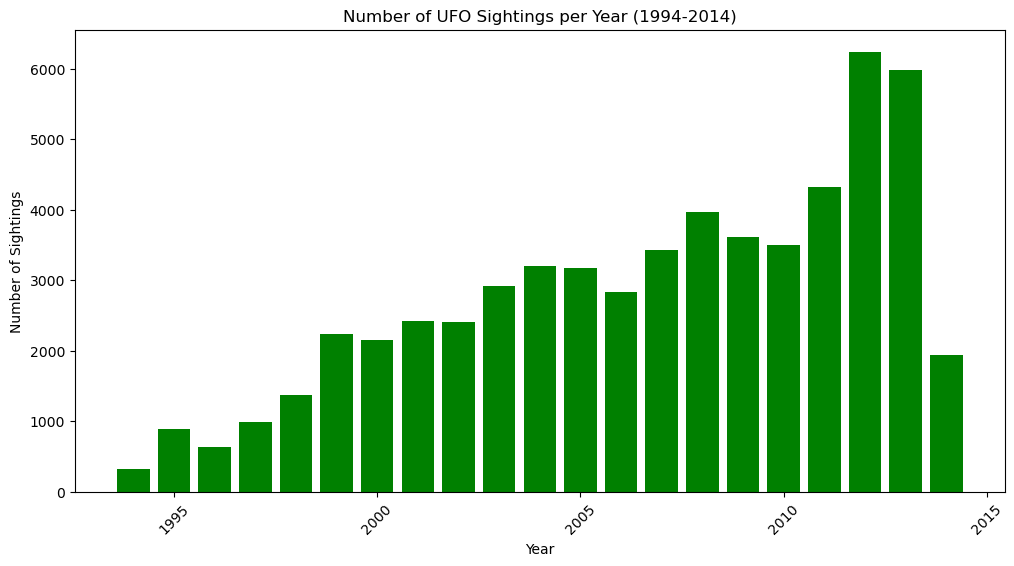

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(df_yearly_sightings['year'], df_yearly_sightings['number_of_sightings'], color='green')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Number of UFO Sightings per Year (1994-2014)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # user inputs
# user_region = 'All'
# user_min_attempts = 0

# # switch on user_region
# if user_region == 'All':
#     where_clause = "and 1=1"
# else:
#     where_clause = f"and region = '{user_region}'"

# # build the query
# query = f"""
#     SELECT
#         name,
#         region,
#         launch_attempts
#     FROM
#         launchpads
#     WHERE
#         launch_attempts >= {user_min_attempts}
#         {where_clause}
#     ORDER BY
#         launch_attempts DESC;
# """

# # execute query
# pie_df = pd.read_sql(text(query), con=engine)
# pie_df.head(10)

In [ ]:
# # user inputs
# user_region = 'All'
# user_min_attempts = 0

# # switch on user_region
# if user_region == 'All':
#     where_clause = "and 1=1"
# else:
#     where_clause = f"and region = '{user_region}'"

# # build the query
# query = f"""
#     SELECT
#         name,
#         full_name,
#         region,
#         latitude,
#         longitude,
#         launch_attempts,
#         launch_successes,
#         launch_attempts - launch_successes as launch_failures
#     FROM
#         launchpads
#     WHERE
#         launch_attempts >= {user_min_attempts}
#         {where_clause}
#     ORDER BY
#         launch_attempts DESC;
# """

# # execute query
# table_df = pd.read_sql(text(query), con=engine)
# table_df.head(10)

In [ ]:
# # user inputs
# user_region = 'All'
# user_min_attempts = 0

# # switch on user_region
# if user_region == 'All':
#     where_clause = "and 1=1"
# else:
#     where_clause = f"and region = '{user_region}'"

# # build the query
# query = f"""
#     SELECT
#         name,
#         full_name,
#         region,
#         latitude,
#         longitude,
#         launch_attempts,
#         launch_successes,
#         launch_attempts - launch_successes as launch_failures
#     FROM
#         launchpads
#     WHERE
#         launch_attempts >= {user_min_attempts}
#         {where_clause}
#     ORDER BY
#         launch_attempts DESC;
# """

# # execute query
# map_df = pd.read_sql(text(query), con=engine)
# map_df.head(10)

In [ ]:
# # practice making visuals
# plt.figure(figsize=(10, 6))
# plt.barh(df.name, df.launch_attempts)
# plt.show()